In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os

from DQN_train import train_dqn
from DDQN_train import train_ddqn

In [2]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
def run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds,
                   replace_target_cnt, max_episode_length):
    
    all_dqn_durations = []
    all_ddqn_durations = []
    all_dqn_returns = []
    all_ddqn_returns = []
    
    for seed in seeds:
        dqn_durations, dqn_returns = train_dqn(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                               eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seed,
                                              replace_target_cnt, max_episode_length)

        ddqn_durations, ddqn_returns = train_ddqn(env_name, n_episodes, batch_size, hidden_dims, lr, gamma,
                                                  eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seed,
                                                 replace_target_cnt, max_episode_length)
        
        
        all_dqn_durations.append(np.array(dqn_durations))
        all_ddqn_durations.append(np.array(ddqn_durations))
        
        all_dqn_returns.append(np.array(dqn_returns))
        all_ddqn_returns.append(np.array(ddqn_returns))
    
    return all_dqn_durations, all_dqn_returns, all_ddqn_durations, all_ddqn_returns

def plot_run(res_dqn, res_ddqn, env_name='LunarLander', metric='returns', save_dir='./results/', smoothed=False):
    if smoothed:
        res_dqn = [smooth(res, 10) for res in res_dqn]
        res_ddqn = [smooth(res, 10) for res in res_ddqn]
        
    res_dqn = np.stack(res_dqn)
    avg_res_dqn = np.mean(res_dqn, axis=0)
    std_res_dqn = np.std(res_dqn, axis=0)
    
    res_ddqn = np.stack(res_ddqn)
    avg_res_ddqn = np.mean(res_ddqn, axis=0)
    std_res_ddqn = np.std(res_ddqn, axis=0)
        
    x = np.arange(avg_res_dqn.shape[0])
        
    plt.plot(avg_res_dqn, label='DQN')
    plt.plot(avg_res_ddqn, label='DDQN')
    plt.fill_between(x, avg_res_dqn+std_res_dqn, avg_res_dqn-std_res_dqn, alpha=0.5)
    plt.fill_between(x, avg_res_ddqn+std_res_ddqn, avg_res_ddqn-std_res_ddqn, alpha=0.5)
    plt.title(f'Episode {metric} per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend()
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    plt.savefig(os.path.join(save_dir, f'{env_name}_{metric}.png'))
    plt.show()
    plt.close()

def plot_results(results, env_name='CartPole', save_dir='./results/', smoothed=True):
    all_dqn_durations, all_dqn_returns, all_ddqn_durations, all_ddqn_returns = results
    
    plot_run(all_dqn_durations, all_ddqn_durations, env_name, metric='durations', 
             save_dir=save_dir, smoothed=smoothed)    
    plot_run(all_dqn_returns, all_ddqn_returns, env_name, metric='returns', 
             save_dir=save_dir, smoothed=smoothed)
    
    save_results(results, f'{env_name}_results')
    
def save_results(results, fname, directory='./results/'):
    if not os.path.exists(directory):
        os.mkdir(directory)
    
    with open(os.path.join(directory, f'{fname}.pkl'), 'wb') as handle:
        pkl.dump(results, handle, protocol=pkl.HIGHEST_PROTOCOL)
        
def load_results(fname, directory='./results/'):
    with open(os.path.join(directory, fname), 'rb') as file:
        results = pkl.load(file)
        
    return results

Episode 0 finished after 80 steps with return -55.24767862361889
Episode 10 finished after 63 steps with return -46.90944570448864
Episode 20 finished after 123 steps with return -70.95115056900356
Episode 30 finished after 15 steps with return -13.994164535871148
Episode 40 finished after 200 steps with return -86.6020325142037
Episode 50 finished after 200 steps with return -86.6020325142037
Episode 60 finished after 200 steps with return -86.6020325142037
Episode 70 finished after 200 steps with return -86.6020325142037
Episode 80 finished after 200 steps with return -86.6020325142037
Episode 90 finished after 20 steps with return -18.20930624027691
Episode 100 finished after 27 steps with return -23.765728565289617
Episode 110 finished after 11 steps with return -10.466174574128356
Episode 120 finished after 30 steps with return -26.029962661171947
Episode 130 finished after 11 steps with return -10.466174574128356
Episode 140 finished after 33 steps with return -28.226946740172476

Episode 210 finished after 8 steps with return -7.72553055720799
Episode 220 finished after 24 steps with return -21.432185919278098
Episode 230 finished after 13 steps with return -12.247897700103202
Episode 240 finished after 20 steps with return -18.20930624027691
Episode 250 finished after 20 steps with return -18.20930624027691
Episode 260 finished after 24 steps with return -21.432185919278098
Episode 270 finished after 23 steps with return -20.63857163563444
Episode 280 finished after 6 steps with return -5.8519850599
Episode 290 finished after 19 steps with return -17.383137616441324
Episode 300 finished after 10 steps with return -9.561792499119552
Episode 310 finished after 39 steps with return -32.42709509397165
Episode 320 finished after 16 steps with return -14.854222890512437
Episode 330 finished after 8 steps with return -7.72553055720799
Episode 340 finished after 29 steps with return -25.28279056684035
Episode 350 finished after 8 steps with return -7.72553055720799
Ep

Episode 430 finished after 12 steps with return -11.361512828387072
Episode 440 finished after 14 steps with return -13.12541872310217
Episode 450 finished after 26 steps with return -22.995685419484463
Episode 460 finished after 19 steps with return -17.383137616441324
Episode 470 finished after 13 steps with return -12.247897700103202
Episode 480 finished after 2 steps with return -1.99
Episode 490 finished after 9 steps with return -8.64827525163591
DQN ran for 27.02819514274597 seconds on Gridworld-16x16
Episode 0 finished after 200 steps with return -86.6020325142037
Episode 10 finished after 99 steps with return -63.02703623502729
Episode 20 finished after 19 steps with return -17.383137616441324
Episode 30 finished after 50 steps with return -39.499393286246324
Episode 40 finished after 104 steps with return -64.83907934419771
Episode 50 finished after 176 steps with return -82.94725691104124
Episode 60 finished after 64 steps with return -47.44035124744375
Episode 70 finished a

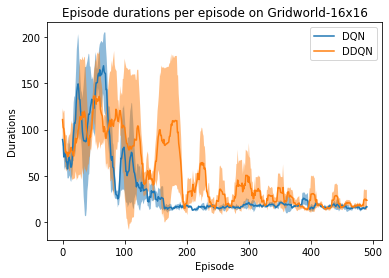

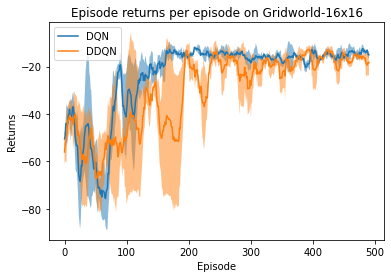

In [3]:
env_name = 'Gridworld-16x16'

n_episodes = 500
batch_size = 128
hidden_dims = [128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e4
replace_target_cnt = 50
max_episode_length = 200

seeds = [42, 126, 284]

results_gridworld = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds,                 
                                    replace_target_cnt, max_episode_length)

plot_results(results_gridworld, env_name, smoothed=True)

Episode 0 finished after 500 steps with return -99.3429516957585
Episode 10 finished after 500 steps with return -99.3429516957585
Episode 20 finished after 500 steps with return -99.3429516957585
Episode 30 finished after 500 steps with return -99.3429516957585
Episode 40 finished after 500 steps with return -99.3429516957585
Episode 50 finished after 296 steps with return -94.89474310107882
Episode 60 finished after 332 steps with return -96.44463161405245
Episode 70 finished after 124 steps with return -71.24163906331353
Episode 80 finished after 276 steps with return -93.7581445220175
Episode 90 finished after 211 steps with return -88.0042871806521
Episode 100 finished after 33 steps with return -28.226946740172476
Episode 110 finished after 36 steps with return -30.35867819504261
Episode 120 finished after 21 steps with return -19.02721317787414
Episode 130 finished after 31 steps with return -26.769663034560228
Episode 140 finished after 22 steps with return -19.836941046095397


Episode 210 finished after 16 steps with return -14.854222890512437
Episode 220 finished after 16 steps with return -14.854222890512437
Episode 230 finished after 16 steps with return -14.854222890512437
Episode 240 finished after 17 steps with return -15.705680661607312
Episode 250 finished after 15 steps with return -13.994164535871148
Episode 260 finished after 16 steps with return -14.854222890512437
Episode 270 finished after 15 steps with return -13.994164535871148
Episode 280 finished after 16 steps with return -14.854222890512437
Episode 290 finished after 16 steps with return -14.854222890512437
Episode 300 finished after 60 steps with return -45.28433576092384
Episode 310 finished after 17 steps with return -15.705680661607312
Episode 320 finished after 20 steps with return -18.20930624027691
Episode 330 finished after 16 steps with return -14.854222890512437
Episode 340 finished after 19 steps with return -17.383137616441324
Episode 350 finished after 16 steps with return -1

Episode 410 finished after 20 steps with return -18.20930624027691
Episode 420 finished after 18 steps with return -16.548623854991238
Episode 430 finished after 17 steps with return -15.705680661607312
Episode 440 finished after 18 steps with return -16.548623854991238
Episode 450 finished after 15 steps with return -13.994164535871148
Episode 460 finished after 15 steps with return -13.994164535871148
Episode 470 finished after 17 steps with return -15.705680661607312
Episode 480 finished after 18 steps with return -16.548623854991238
Episode 490 finished after 46 steps with return -37.017636879676736
DQN ran for 31.354479551315308 seconds on Windy-Gridworld
Episode 0 finished after 500 steps with return -99.3429516957585
Episode 10 finished after 500 steps with return -99.3429516957585
Episode 20 finished after 500 steps with return -99.3429516957585
Episode 30 finished after 500 steps with return -99.3429516957585
Episode 40 finished after 500 steps with return -99.3429516957585
Ep

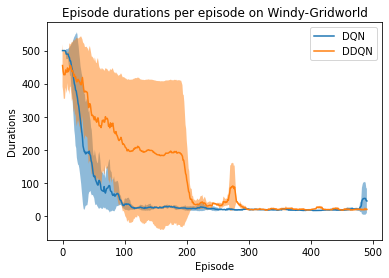

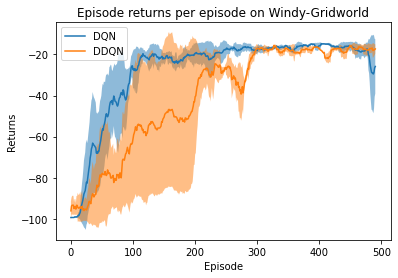

In [10]:
env_name = 'Windy-Gridworld'

n_episodes = 500
batch_size = 128
hidden_dims = [128]
lr = 1e-3
gamma = 0.99
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e4
replace_target_cnt = 200
max_episode_length = 500

seeds = [42, 126, 284]

results_windy_gridworld = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds,                 
                                    replace_target_cnt, max_episode_length)

plot_results(results_windy_gridworld, env_name, smoothed=True)

Episode 0 finished after 111 steps with return -102.00250842737856
Episode 10 finished after 62 steps with return -73.8426388188809
Episode 20 finished after 188 steps with return -24.03799727588854
Episode 30 finished after 1000 steps with return -8.887546621198418
Episode 40 finished after 1000 steps with return 6.918868663469538
Episode 50 finished after 345 steps with return 13.377352880626955
Episode 60 finished after 1000 steps with return 23.248835650749683
Episode 70 finished after 1000 steps with return 12.980839262949464
Episode 80 finished after 1000 steps with return 15.029828762533086
Episode 90 finished after 1000 steps with return 27.02838974552848
Episode 100 finished after 1000 steps with return 40.848475459903845
Episode 110 finished after 1000 steps with return 33.52167122160706
Episode 120 finished after 1000 steps with return 12.433447365864122
Episode 130 finished after 1000 steps with return 23.64991190208901
Episode 140 finished after 1000 steps with return 23.0

Episode 510 finished after 417 steps with return 61.35886959486425
Episode 520 finished after 280 steps with return 67.8058958030265
Episode 530 finished after 294 steps with return 70.52736783831713
Episode 540 finished after 396 steps with return 45.08241507517467
Episode 550 finished after 1000 steps with return 43.185174664947105
Episode 560 finished after 411 steps with return 49.686107595735784
Episode 570 finished after 589 steps with return 40.35186529832474
Episode 580 finished after 407 steps with return 44.69970464246634
Episode 590 finished after 614 steps with return 57.789485442003546
Episode 600 finished after 446 steps with return 41.20041726915326
Episode 610 finished after 291 steps with return 64.60301681087631
Episode 620 finished after 357 steps with return 48.67568792743321
Episode 630 finished after 396 steps with return 67.20879292529291
Episode 640 finished after 539 steps with return 68.41787639560725
Episode 650 finished after 558 steps with return 28.1109340

Episode 320 finished after 1000 steps with return 42.52274647317015
Episode 330 finished after 1000 steps with return 63.05473898436662
Episode 340 finished after 836 steps with return 41.075460469641364
Episode 350 finished after 649 steps with return 42.98577763280944
Episode 360 finished after 1000 steps with return 53.62281704568352
Episode 370 finished after 793 steps with return 35.007393168254076
Episode 380 finished after 1000 steps with return 42.64174136415159
Episode 390 finished after 859 steps with return 46.13811373496863
Episode 400 finished after 882 steps with return 47.56732592258308
Episode 410 finished after 997 steps with return 18.449957831445058
Episode 420 finished after 1000 steps with return 28.810128187379743
Episode 430 finished after 752 steps with return 61.840395535048614
Episode 440 finished after 647 steps with return 38.85239015508718
Episode 450 finished after 897 steps with return 38.88225034656886
Episode 460 finished after 751 steps with return 41.

Episode 130 finished after 393 steps with return 19.364414355103644
Episode 140 finished after 642 steps with return 45.52892278432119
Episode 150 finished after 1000 steps with return 15.196581194970397
Episode 160 finished after 436 steps with return 62.273281045177825
Episode 170 finished after 754 steps with return 36.51504245344465
Episode 180 finished after 401 steps with return 66.9265995368036
Episode 190 finished after 522 steps with return 57.59078305450843
Episode 200 finished after 433 steps with return 62.65531807307442
Episode 210 finished after 334 steps with return 52.15998872494295
Episode 220 finished after 321 steps with return 72.06106795460282
Episode 230 finished after 374 steps with return 47.24853507313861
Episode 240 finished after 260 steps with return 54.573980943650135
Episode 250 finished after 283 steps with return 76.23505900585583
Episode 260 finished after 564 steps with return 70.0611464060475
Episode 270 finished after 348 steps with return 45.9514121

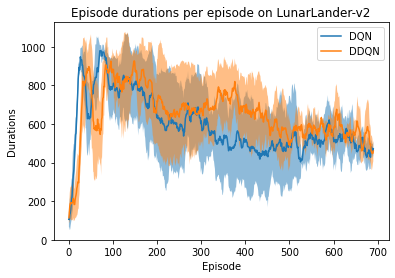

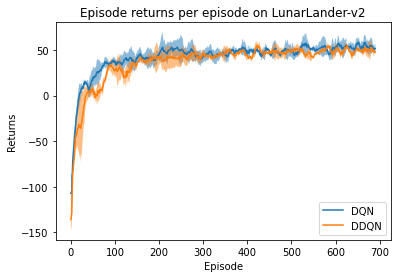

In [5]:
env_name = 'LunarLander-v2'

n_episodes = 700
batch_size = 128
hidden_dims = [128, 128, 128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.1
eps_decay_iters = 500
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e6
replace_target_cnt = 1000
max_episode_length = 1000

seeds = [42, 126, 284]

results_lunarlander = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                    eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds, 
                                    replace_target_cnt, max_episode_length)

plot_results(results_lunarlander, env_name, smoothed=True)

Episode 0 finished after 117 steps with return -51.4857386482538
Episode 10 finished after 1000 steps with return 25.975115652666567
Episode 20 finished after 1000 steps with return 31.296863096087744
Episode 30 finished after 1000 steps with return 17.29107425013776
Episode 40 finished after 1000 steps with return 19.221595790910374
Episode 50 finished after 412 steps with return 8.712631813986759
Episode 60 finished after 131 steps with return 11.977879164291345
Episode 70 finished after 118 steps with return 24.158434276203675
Episode 80 finished after 694 steps with return 30.611548551661727
Episode 90 finished after 1000 steps with return 38.814652719758556
Episode 100 finished after 1000 steps with return 28.872110816255653
Episode 110 finished after 1000 steps with return 51.58783467835821
Episode 120 finished after 1000 steps with return 47.031508690183784
Episode 130 finished after 1000 steps with return 36.637146741153
Episode 140 finished after 1000 steps with return 32.1094

Episode 510 finished after 1000 steps with return 47.30229117152976
Episode 520 finished after 1000 steps with return 22.319555434959177
Episode 530 finished after 541 steps with return 26.981551894128618
Episode 540 finished after 186 steps with return 32.05049938932901
Episode 550 finished after 573 steps with return 33.911168354537324
Episode 560 finished after 550 steps with return 50.21323982789506
Episode 570 finished after 979 steps with return 80.61290275770982
Episode 580 finished after 318 steps with return 80.38315091047158
Episode 590 finished after 470 steps with return 27.499535170955212
Episode 600 finished after 1000 steps with return 34.45929341040787
Episode 610 finished after 713 steps with return 44.79934188734491
Episode 620 finished after 471 steps with return 45.90032832119511
Episode 630 finished after 436 steps with return 57.02438886883623
Episode 640 finished after 257 steps with return 35.64640686806013
Episode 650 finished after 195 steps with return 39.336

Episode 300 finished after 1000 steps with return 55.077035154651504
Episode 310 finished after 374 steps with return 51.2494711119556
Episode 320 finished after 554 steps with return 41.14434772467391
Episode 330 finished after 1000 steps with return 50.738436275117785
Episode 340 finished after 1000 steps with return 25.763729939130524
Episode 350 finished after 83 steps with return -17.839805972013266
Episode 360 finished after 1000 steps with return 48.11733672993837
Episode 370 finished after 1000 steps with return 67.12599367351291
Episode 380 finished after 808 steps with return 85.36207242545943
Episode 390 finished after 227 steps with return 35.83204414724236
Episode 400 finished after 873 steps with return 65.5008016375508
Episode 410 finished after 674 steps with return 50.05163466815725
Episode 420 finished after 166 steps with return 33.22819599893515
Episode 430 finished after 398 steps with return 58.700283566124526
Episode 440 finished after 1000 steps with return 38.9

Episode 100 finished after 286 steps with return 26.005376336794953
Episode 110 finished after 1000 steps with return 34.07102173036809
Episode 120 finished after 182 steps with return 10.988022760649159
Episode 130 finished after 1000 steps with return 36.95089102223908
Episode 140 finished after 273 steps with return 18.895422360598754
Episode 150 finished after 956 steps with return 71.06384947741276
Episode 160 finished after 1000 steps with return 27.506384744208717
Episode 170 finished after 1000 steps with return 40.53008286032847
Episode 180 finished after 1000 steps with return 39.55112174979787
Episode 190 finished after 1000 steps with return 54.18013066888673
Episode 200 finished after 1000 steps with return 38.208937461779264
Episode 210 finished after 1000 steps with return 36.67392041700093
Episode 220 finished after 1000 steps with return 55.9230091074418
Episode 230 finished after 787 steps with return 37.60766057766192
Episode 240 finished after 950 steps with return 

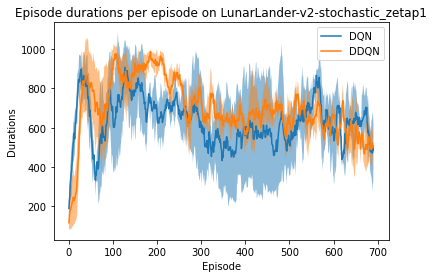

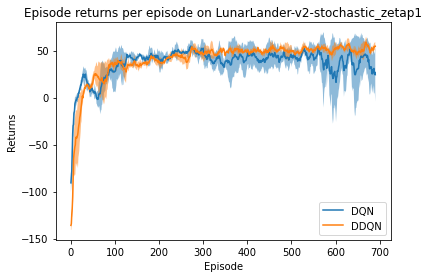

In [6]:
env_name = 'LunarLander-v2-stochastic_zetap1'

n_episodes = 700
batch_size = 128
hidden_dims = [128, 128, 128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.1
eps_decay_iters = 500
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e6
replace_target_cnt = 1000
max_episode_length = 1000

seeds = [42, 126, 284]

results_lunarlander_stoch_zetap1 = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds, 
                                                   replace_target_cnt, max_episode_length)

plot_results(results_lunarlander_stoch_zetap1, env_name, smoothed=True)

Episode 0 finished after 116 steps with return -44.13053109377641
Episode 10 finished after 312 steps with return -16.705003401207797
Episode 20 finished after 1000 steps with return 7.649050708579525
Episode 30 finished after 1000 steps with return 55.83874289278008
Episode 40 finished after 1000 steps with return 7.2209488930273364
Episode 50 finished after 1000 steps with return 25.38868065331753
Episode 60 finished after 1000 steps with return 44.51898548355641
Episode 70 finished after 1000 steps with return 47.03746890956948
Episode 80 finished after 1000 steps with return 38.622711687000255
Episode 90 finished after 196 steps with return -21.12925180138055
Episode 100 finished after 1000 steps with return 16.44133799020249
Episode 110 finished after 1000 steps with return 48.403803448569796
Episode 120 finished after 1000 steps with return 34.48451108336636
Episode 130 finished after 599 steps with return 19.6236228366368
Episode 140 finished after 638 steps with return 61.28574

Episode 510 finished after 424 steps with return 39.58233708356811
Episode 520 finished after 790 steps with return 23.70080607514856
Episode 530 finished after 619 steps with return 55.75003121694925
Episode 540 finished after 472 steps with return 54.49633397648317
Episode 550 finished after 806 steps with return 37.74666170243512
Episode 560 finished after 212 steps with return 42.74287478431557
Episode 570 finished after 631 steps with return 51.72751896952228
Episode 580 finished after 354 steps with return 44.9647491986045
Episode 590 finished after 452 steps with return 52.65082147724432
Episode 600 finished after 633 steps with return 42.95123699379766
Episode 610 finished after 422 steps with return 48.27645636759931
Episode 620 finished after 306 steps with return 50.17732420667052
Episode 630 finished after 620 steps with return 49.919494087037926
Episode 640 finished after 334 steps with return 65.06300277750984
Episode 650 finished after 459 steps with return 38.4559177555

Episode 300 finished after 207 steps with return 15.232864327098175
Episode 310 finished after 81 steps with return -1.3484338584755804
Episode 320 finished after 74 steps with return -65.66367531139292
Episode 330 finished after 101 steps with return 2.248985733146732
Episode 340 finished after 96 steps with return -14.283146065067989
Episode 350 finished after 59 steps with return -40.513974956384104
Episode 360 finished after 113 steps with return 23.82956354384735
Episode 370 finished after 84 steps with return -45.78669821112155
Episode 380 finished after 73 steps with return -38.67035515251899
Episode 390 finished after 124 steps with return 24.568941443727923
Episode 400 finished after 85 steps with return -32.80874225843625
Episode 410 finished after 136 steps with return 26.942047396217536
Episode 420 finished after 80 steps with return -35.13687474795561
Episode 430 finished after 147 steps with return 0.25792049040559206
Episode 440 finished after 74 steps with return -52.86

Episode 100 finished after 1000 steps with return 25.2662780896438
Episode 110 finished after 1000 steps with return 31.18733738650651
Episode 120 finished after 1000 steps with return 12.094192708858182
Episode 130 finished after 1000 steps with return 16.787543146528456
Episode 140 finished after 1000 steps with return 18.624305611352177
Episode 150 finished after 1000 steps with return 34.40979413184536
Episode 160 finished after 1000 steps with return 35.62746202662797
Episode 170 finished after 1000 steps with return 45.81959661739669
Episode 180 finished after 563 steps with return 9.984180475148738
Episode 190 finished after 854 steps with return 56.140097503406295
Episode 200 finished after 1000 steps with return 22.30019416235545
Episode 210 finished after 1000 steps with return 18.954806099266964
Episode 220 finished after 1000 steps with return 26.017816219445418
Episode 230 finished after 1000 steps with return 60.21960542199383
Episode 240 finished after 615 steps with ret

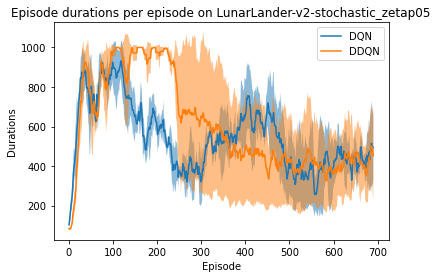

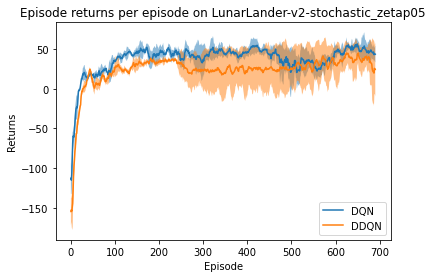

In [7]:
env_name = 'LunarLander-v2-stochastic_zetap05'

n_episodes = 700
batch_size = 128
hidden_dims = [128, 128, 128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.1
eps_decay_iters = 500
# Zeta is not applicable in deterministic environments
zeta = 0.05
mem_cap = 1e6
replace_target_cnt = 1000
max_episode_length = 1000

seeds = [42, 126, 284]

results_lunarlander_stoch_zetap05 = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                                    eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds, 
                                                    replace_target_cnt, max_episode_length)

plot_results(results_lunarlander_stoch_zetap05, env_name, smoothed=True)